In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv("AirQuality.csv")

In [3]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = data.iloc[:, 2:]

# Optionally, you can drop any rows with missing values
X.dropna(inplace=True)

# Optionally, you can convert X to a NumPy array if needed
X = X.values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute PCA
pca = PCA()
principal_components = pca.fit_transform(X_scaled)

# Determine the number of components to keep
# For example, you can choose components that explain at least 95% of the variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Select the desired number of components
selected_components = principal_components[:, :num_components]

# Fit a new StandardScaler on the selected principal components
scaler_selected = StandardScaler()
scaler_selected.fit(selected_components)

# Inverse transform the selected components to obtain the corresponding features
selected_features = scaler_selected.inverse_transform(selected_components)
print(selected_features)

[[-3.50309703  0.97654803 -0.52095291  2.29681093  0.11203843]
 [-2.32759388 -0.1098663  -1.01472571  2.07877033  0.0842854 ]
 [-2.79483105  0.33180746 -0.93913458  1.88138919  0.14298831]
 ...
 [-0.8668593   2.08725383 -0.24747443 -0.46551007 -0.03029448]
 [ 0.73543764  1.01707105 -0.82729717 -0.45004971 -0.01083463]
 [ 0.07075165  1.48582293 -0.60398207 -0.45324728 -0.03373146]]


In [5]:
# Get the principal component loadings (eigenvectors)
loadings = pca.components_

# Print the loadings for each principal component
for i, component in enumerate(loadings):
    print(f"Principal Component {i+1} Loadings:")
    for j, feature in enumerate(data.columns[2:2+len(component)]):  # Adjust the columns to match the component size
        print(f"{feature}: {component[j]}")
    print()

Principal Component 1 Loadings:
CO(GT): 0.004102162180320743
PT08.S1(CO): -0.36375424772598536
NMHC(GT): -0.038279688081851435
C6H6(GT): -0.3805722913430768
PT08.S2(NMHC): -0.3377771443686648
NOx(GT): -0.03732021316646063
PT08.S3(NOx): -0.1430699084972388
NO2(GT): -0.01687156493338851
PT08.S4(NO2): -0.337443416208501
PT08.S5(O3): -0.2986105807330311
T: -0.36102173089435563
RH: -0.34657784497956146
AH: -0.36281722561480023

Principal Component 2 Loadings:
CO(GT): 0.361868678534696
PT08.S1(CO): 0.14182505495869047
NMHC(GT): 0.07656326757493241
C6H6(GT): -0.07981737011833251
PT08.S2(NMHC): 0.19622581839698774
NOx(GT): 0.5278561792575699
PT08.S3(NOx): -0.3804960454606273
NO2(GT): 0.4828403621205004
PT08.S4(NO2): 0.0358777374078166
PT08.S5(O3): 0.275625219032763
T: -0.1549400199261623
RH: -0.13608430154645232
AH: -0.1478964934232449

Principal Component 3 Loadings:
CO(GT): -0.5284267274125922
PT08.S1(CO): 0.14242207802680815
NMHC(GT): -0.04415702503030323
C6H6(GT): -0.1046692545687358
PT08.

In [6]:
from sklearn.cluster import KMeans

# Assuming "selected_features" contains the unscaled reconstructed features
# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Specify the number of clusters
kmeans.fit(selected_features)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame or save them for further analysis
# For example, you can create a new column in the DataFrame to store the cluster labels
data['Cluster'] = cluster_labels


The output values you see are the loadings of the principal components. Each loading represents the correlation between a particular original feature and the principal component. A high absolute value of a loading indicates that the corresponding feature contributes significantly to that principal component.

The loadings can be positive or negative, which represents the direction of the correlation. A positive loading means that as the feature value increases, the principal component value also increases. A negative loading means that as the feature value increases, the principal component value decreases.

The reason the loadings decrease after each Principal Component Analysis (PCA) is due to the nature of PCA. PCA orders the principal components by the amount of variance they explain in the data. The first principal component explains the most variance, the second principal component (which is uncorrelated with the first) explains the second most, and so on. Therefore, the importance of the features (as represented by the loadings) tends to decrease with each subsequent principal component.

As for choosing the best features for K-means clustering based on these loadings, it’s common to choose the features that have high loadings (either positive or negative) on the first few principal components, as these features explain the most variance in the data

In [7]:
features = ["PT08.S1(CO)", "C6H6(GT)", "T", "RH", "AH"]

In [8]:
data = data.dropna(subset=features)

In [9]:
data = data[features].copy()

In [10]:
data

,PT08.S1(CO),C6H6(GT),T,RH,AH
0,1360,11.9,13.6,48.9,0.7578
1,1292,9.4,13.3,47.7,0.7255
2,1402,9.0,11.9,54.0,0.7502
3,1376,9.2,11.0,60.0,0.7867
4,1272,6.5,11.2,59.6,0.7888
...,...,...,...,...,...
9352,1314,13.5,21.9,29.3,0.7568
9353,1163,11.4,24.3,23.7,0.7119
9354,1142,12.4,26.9,18.3,0.6406
9355,1003,9.5,28.3,13.5,0.5139


# Pseudocode

## High level

1. Scale data to standardize values
2. Initialize random centroids
3. Get labels for each data point
4. Create new centroids
5. Plot the centroids
6. Repeat 3-5 until the centroids stop changing

In [11]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [12]:
data.head()

,PT08.S1(CO),C6H6(GT),T,RH,AH
0,7.964286,9.035647,9.732625,9.621406,10.927153
1,7.660714,8.940842,9.720360,9.579841,10.925555
2,8.151786,8.925673,9.663123,9.798060,10.926777
3,8.035714,8.933257,9.626329,10.005888,10.928582
4,7.571429,8.830868,9.634505,9.992033,10.928686


In [13]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [14]:
centroids = random_centroids(data, 5)

C:\Users\buing\AppData\Local\Temp\ipykernel_11648\1845334667.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [15]:
centroids

,0,1,2,3,4
PT08.S1(CO),5.687500,5.866071,7.062500,5.808036,6.68750
C6H6(GT),9.248009,8.978764,8.728479,9.092529,8.93705
T,9.381030,10.215045,9.646770,9.462796,1.00000
RH,9.766886,9.036024,9.264635,10.355733,9.62487
AH,10.952975,10.977738,10.942670,10.942180,10.98429


In [16]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [17]:
labels = get_labels(data, centroids)

In [18]:
labels.value_counts()

2    4403
1    2199
3    1716
0     673
4     366
Name: count, dtype: int64

In [19]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [21]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

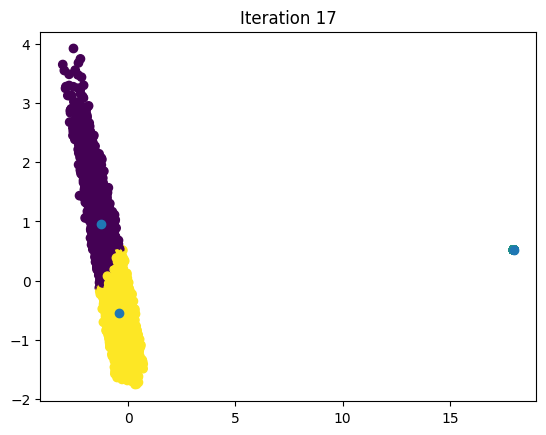

In [22]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [23]:
centroids

,0,1,2
PT08.S1(CO),7.875317,1.0,6.212059
C6H6(GT),9.244422,1.0,8.819247
T,9.919128,1.0,9.918899
RH,9.732879,1.0,9.553114
AH,10.943297,1.0,10.938854


In [24]:
labels.value_counts()

2    5916
0    3075
1     366
Name: count, dtype: int64

In [ ]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [ ]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
PT08.S1(CO),6.241248,1.0,7.923738
C6H6(GT),8.822569,1.0,9.254524
T,9.926531,1.0,9.923455
RH,9.574491,1.0,9.749732
AH,10.938942,1.0,10.943284


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data[["PT08.S1(CO)", "C6H6(GT)", "T", "RH", "AH"]]=scaler.fit_transform(data[["PT08.S1(CO)", "C6H6(GT)", "T", "RH", "AH"]])

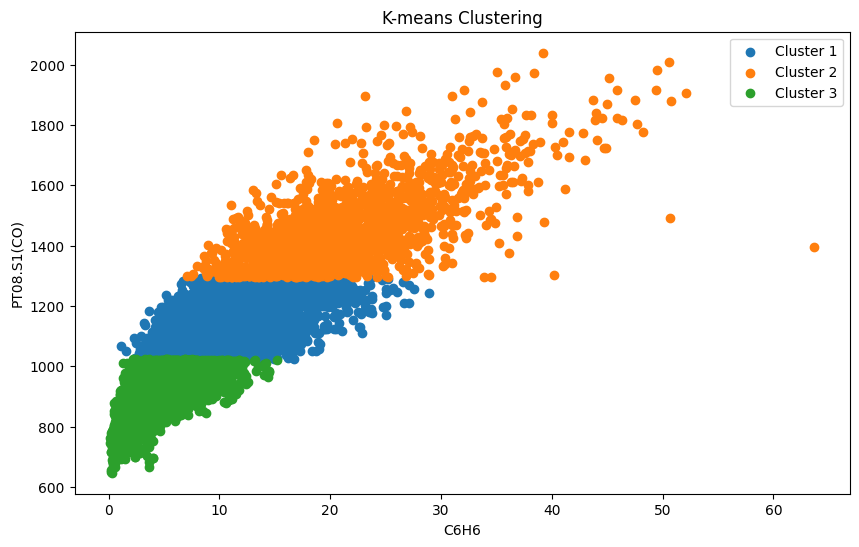

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("AirQuality.csv")
data.replace(-200, np.nan, inplace=True)
# Extract selected features based on principal component loadings
# Assuming the selected features are ['PT08.S1(CO)', 'C6H6(GT)', 'T', 'RH', 'AH']
selected_features = data[['PT08.S1(CO)', 'C6H6(GT)', 'T', 'RH', 'AH']]
selected_features = selected_features.dropna(subset=features)
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Specify the number of clusters
kmeans.fit(selected_features)
cluster_labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(3):  # Adjust based on the number of clusters
    plt.scatter(selected_features[cluster_labels == cluster]['C6H6(GT)'], 
                selected_features[cluster_labels == cluster]['PT08.S1(CO)'], 
                label=f'Cluster {cluster + 1}')
plt.xlabel('C6H6')
plt.ylabel('PT08.S1(CO)')
plt.title('K-means Clustering')
plt.legend()
plt.show()


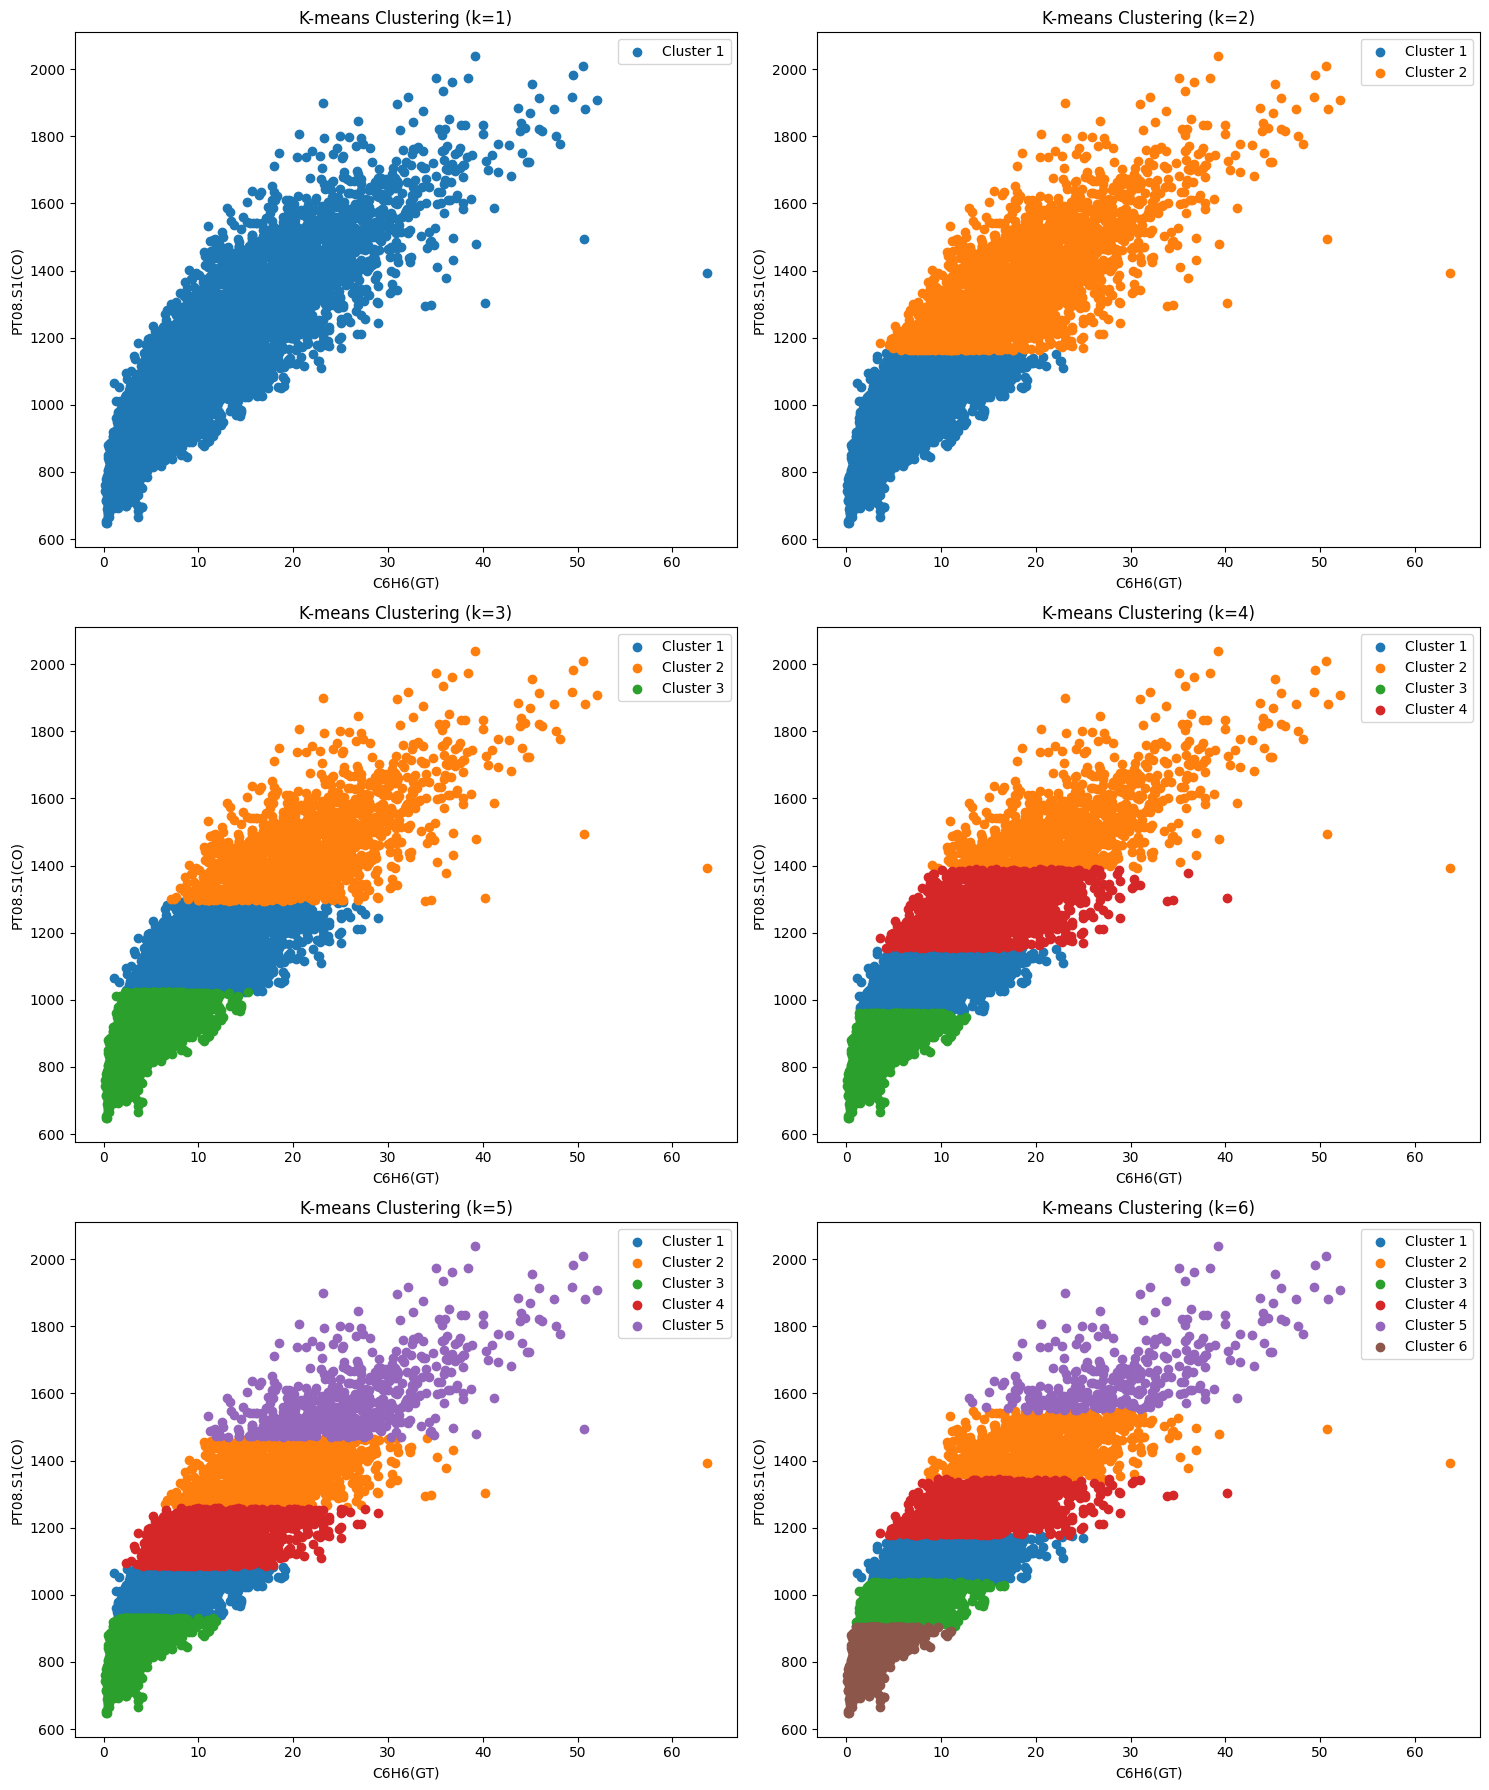

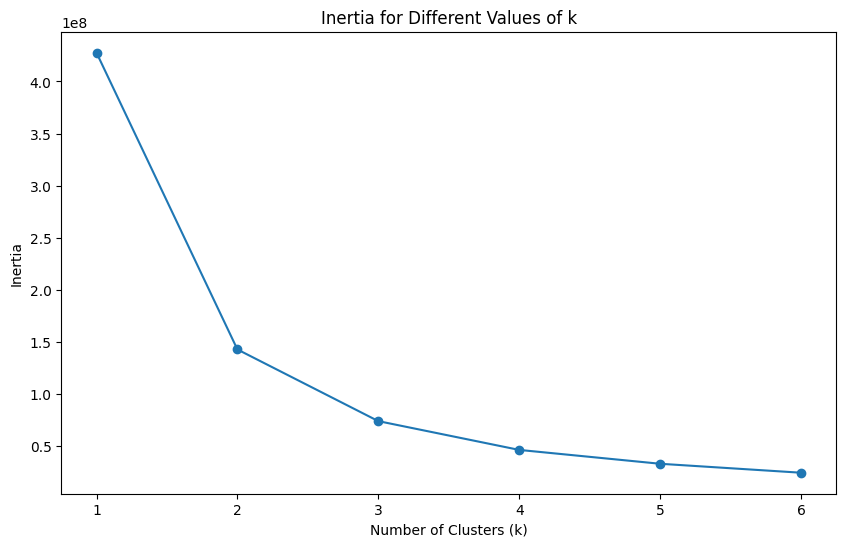

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("AirQuality.csv")
data.replace(-200, np.nan, inplace=True)

# Extract selected features based on principal component loadings
# Assuming the selected features are ['PT08.S1(CO)', 'C6H6(GT)', 'T', 'RH', 'AH']
selected_features = data[['PT08.S1(CO)', 'C6H6(GT)', 'T', 'RH', 'AH']]
selected_features = selected_features.dropna()

# Define the range of k values
k_values = range(1, 7)

# List to store inertia values
inertia_values = []

# Create subplots for clustering results
fig, axs = plt.subplots(3, 2, figsize=(15, 18))
axs = axs.flatten()

# Perform K-means clustering and plot the clusters for each k
for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_features)
    cluster_labels = kmeans.labels_
    inertia_values.append(kmeans.inertia_)
    
    axs[i].set_title(f'K-means Clustering (k={k})')
    for cluster in range(k):
        axs[i].scatter(selected_features[cluster_labels == cluster]['C6H6(GT)'], 
                       selected_features[cluster_labels == cluster]['PT08.S1(CO)'], 
                       label=f'Cluster {cluster + 1}')
    axs[i].set_xlabel('C6H6(GT)')
    axs[i].set_ylabel('PT08.S1(CO)')
    axs[i].legend()

# Hide the last empty subplot if k_values has less elements than the number of subplots
if len(k_values) < len(axs):
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()

# Plot inertia values
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia for Different Values of k')
plt.show()


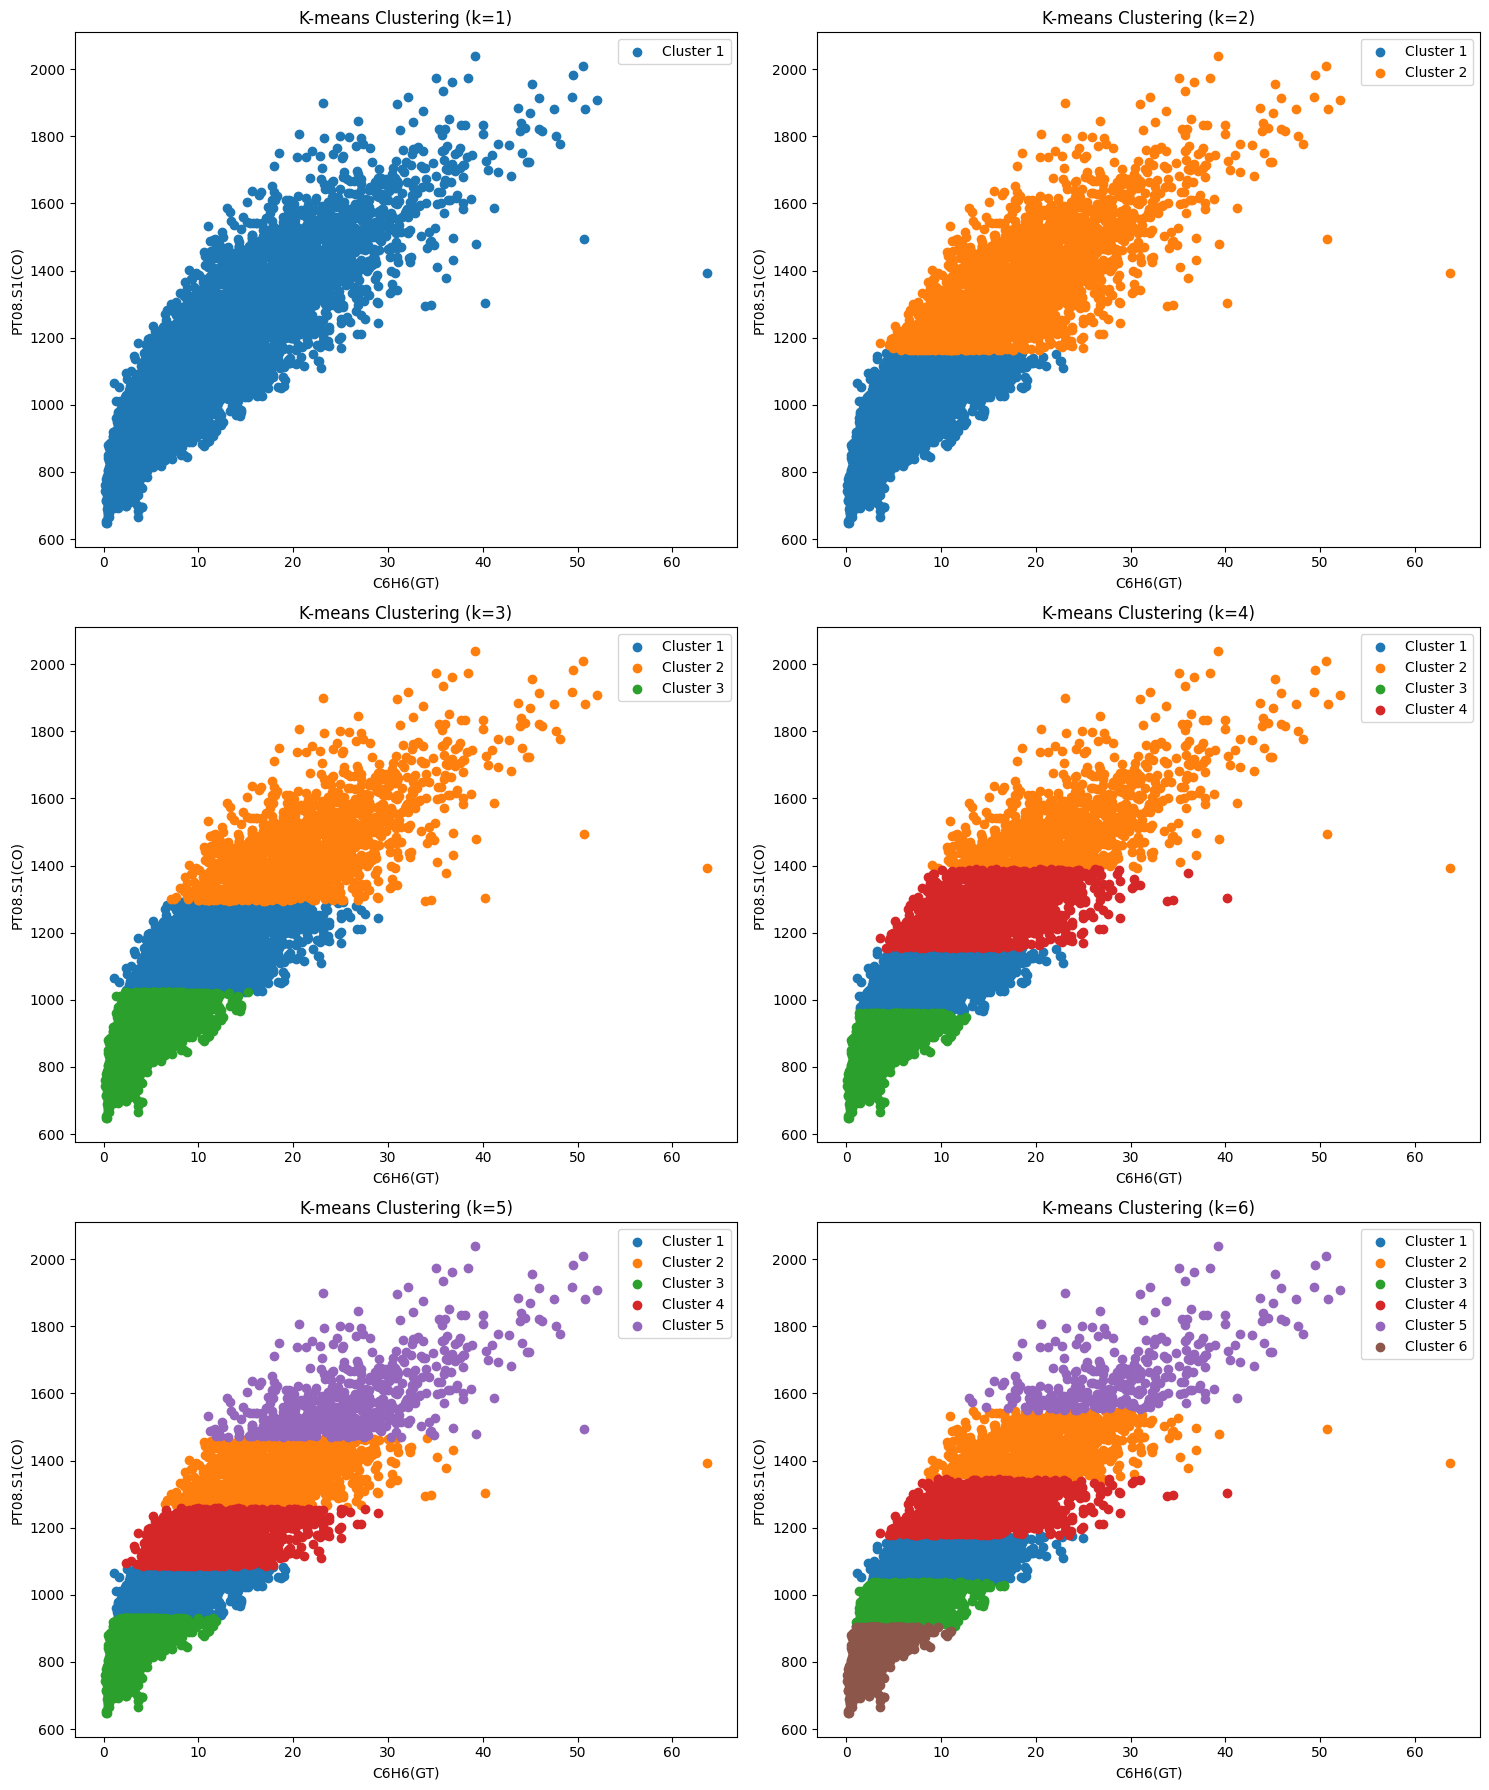

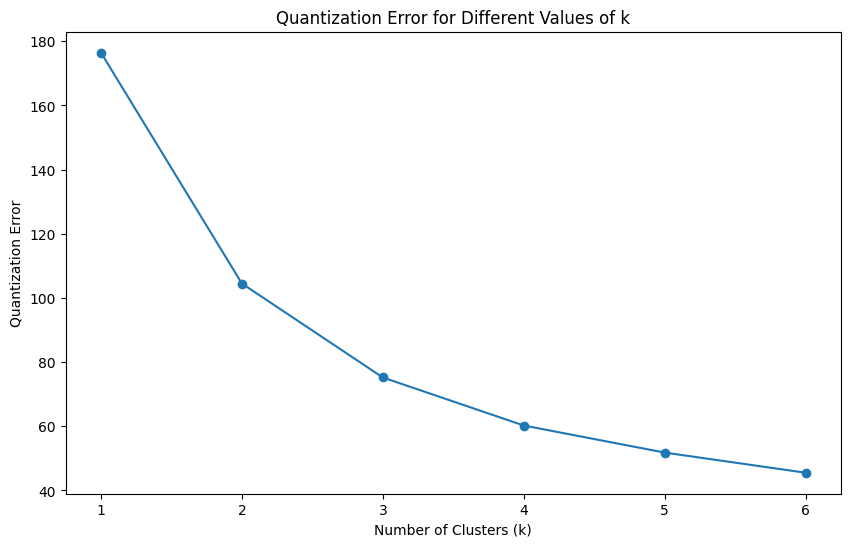

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("AirQuality.csv")
data.replace(-200, np.nan, inplace=True)

# Extract selected features based on principal component loadings
# Assuming the selected features are ['PT08.S1(CO)', 'C6H6(GT)', 'T', 'RH', 'AH']
selected_features = data[['PT08.S1(CO)', 'C6H6(GT)', 'T', 'RH', 'AH']]
selected_features = selected_features.dropna()

# Define the range of k values
k_values = range(1, 7)

# List to store quantization error values
quantization_error_values = []

# Create subplots for clustering results
fig, axs = plt.subplots(3, 2, figsize=(15, 18))
axs = axs.flatten()

# Perform K-means clustering and plot the clusters for each k
for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_features)
    cluster_labels = kmeans.labels_
    
    # Calculate quantization error
    quantization_error = np.sum(np.min(kmeans.transform(selected_features), axis=1)) / selected_features.shape[0]
    quantization_error_values.append(quantization_error)
    
    axs[i].set_title(f'K-means Clustering (k={k})')
    for cluster in range(k):
        axs[i].scatter(selected_features[cluster_labels == cluster]['C6H6(GT)'], 
                       selected_features[cluster_labels == cluster]['PT08.S1(CO)'], 
                       label=f'Cluster {cluster + 1}')
    axs[i].set_xlabel('C6H6(GT)')
    axs[i].set_ylabel('PT08.S1(CO)')
    axs[i].legend()

# Hide the last empty subplot if k_values has less elements than the number of subplots
if len(k_values) < len(axs):
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()

# Plot quantization error values
plt.figure(figsize=(10, 6))
plt.plot(k_values, quantization_error_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Quantization Error')
plt.title('Quantization Error for Different Values of k')
plt.show()
